In [9]:
import random as r
from pprint import pprint
import matplotlib.pyplot as plt
import glob
import imageio
from IPython import display # A command shell for interactive computing in Python.


In [10]:
x_SIZE = 140
y_SIZE = 140

In [11]:
def center_maze(maze):
  fixed_maze = maze
  if sum(fixed_maze[0])+sum(fixed_maze[1]) == 0:
    for row in range(1, len(maze)-1):
      next_row = row + 1
      fixed_maze[row] = fixed_maze[next_row]
    fixed_maze[len(fixed_maze)-1] = [0 for _ in range(len(fixed_maze[0]))]
  if sum(row[0] for row in fixed_maze)+sum(row[1] for row in fixed_maze) == 0:
    for row in range(1, len(fixed_maze)):
      for column in range(len(fixed_maze[row])-1):
        fixed_maze[row][column] = fixed_maze[row][column+1]

        if column == len(fixed_maze[row])-2:
          fixed_maze[row][column+1] = 0
  return fixed_maze

def display_maze(maze):
    plt.imshow(maze, cmap='gray')
    plt.axis('off')

def save_maze(maze, path, index):
    plt.axis('off')
    plt.imsave(path+'/maze{}.png'.format(index),maze,cmap='gray',dpi=200)

def make_gif():
    anim_file = 'maze.gif'

    with imageio.get_writer(anim_file,mode='I') as writer:
      filenames = glob.glob('fig_*.png')
      filenames = sorted(filenames)

      images = []
      for filename in filenames:
          images.append(imageio.imread(filename))
      imageio.mimsave('maze.gif', images)


def expand(state, maze):
    nodes = []
    x = state[0]
    y = state[1]
    x_size = len(maze)
    y_size = len(maze[0])

    # arriba
    if x-2 > 0:
        if maze[x-2][y] < 1: nodes.append((x-2, y, maze[x-2][y]))
    # izquierda
    if y-2 > 0:
        if maze[x][y-2] < 1: nodes.append((x,y-2, maze[x][y-2]))
    # abajo
    if x+2 < x_size:
        if maze[x+2][y] < 1: nodes.append((x+2,y, maze[x+2][y]))
    # derecha
    if y+2 < y_size:
        if maze[x][y+2] < 1: nodes.append((x,y+2, maze[x][y+2]))

    return nodes

def rand_dfs_maze(x_size, y_size, draw):
    stack = []

    if x_size%2 == 0: x_size += 1
    if y_size%2 == 0: y_size += 1

    x_start, y_start = r.randint(1, x_size-2), r.randint(1, y_size-2)
    # x_start, y_start = 0, 0
    # print(x_start, y_start)

    maze = [[0 for _ in range(y_size)] for _ in range(x_size)]

    maze[x_start][y_start] = 1
    
    
    current_state = (x_start , y_start, maze[x_start][y_start])
    options = expand(current_state, maze)

    chosen = r.choice(options)

    stack.append(current_state)
    # print(options)

    maze[chosen[0]][chosen[1]] = 1
    maze[int((chosen[0]+current_state[0])/2)][int((chosen[1]+current_state[1])/2)] = 1
    current_state = chosen
    end = False
    ii = 0
    while True:
        options = expand(current_state, maze)
        while len(options) == 0:
            if len(stack) == 0:
                end = True
                break
            current_state = stack.pop()
            options = expand(current_state, maze)
        if len(stack) == 0 and end: break

        # print(stack)

        chosen = r.choice(options)

        if len(options) - 1 > 0:
            stack.append(current_state)

        maze[chosen[0]][chosen[1]] = 1
        maze[int((chosen[0]+current_state[0])/2)][int((chosen[1]+current_state[1])/2)] = 1
        current_state = chosen

        if draw: save_maze(maze, ".", ii)
        ii +=1
    if draw:
      display_maze(maze)
      make_gif()
    return center_maze(maze)


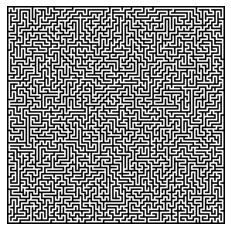

In [12]:
final_maze = rand_dfs_maze(x_SIZE, y_SIZE, False)

display_maze(final_maze)

In [13]:
def open_maze(maze, openings=1):
    new_maze = maze
    
    for _ in range(openings):
        side = r.randint(0,3)

        if side == 0: # arriba
            x, y = 0, r.randint(1, len(maze[0])-2)
            while maze[x+1][y] == 0 or new_maze[x][y] == 1:
                y = r.randint(1, len(maze[0])-2)
        elif side == 1: # dcha
            x, y = r.randint(1, len(maze)-2), len(maze[0])-1
            while maze[x][y-1] == 0 or new_maze[x][y] == 1:
                x = r.randint(1, len(maze)-2)
        elif side == 2: # abajo
            x, y = len(maze)-1, r.randint(1, len(maze[0])-2)
            while maze[x-1][y] == 0 or new_maze[x][y] == 1:
                y = r.randint(1, len(maze[0])-2)
        else: # izq
            x, y = r.randint(1, len(maze)-2), 0
            while maze[x][y+1] == 0 or new_maze[x][y] == 1:
                x = r.randint(1, len(maze)-2)
        
        new_maze[x][y] = 1

    return new_maze


In [14]:
def maze_to_csv(maze, path, index):
    f = open(path + "/maze{}.csv".format(index), "w+")
    for row in maze:
        for column in row:
            f.write(str(column) + ',')
        f.write('\n')
    f.close()

In [15]:
def create_mazes(sizex, sizey, number, path):
    for i in range(number):
        maze = rand_dfs_maze(sizex, sizey, False)
        maze = open_maze(maze, r.randint(2, int(sizey/3)))
        maze_to_csv(maze, path+"/csv", i)
        save_maze(maze, path+"/imgs", i)

In [16]:
%%bash

mkdir mazes
mkdir mazes/csv
mkdir mazes/imgs

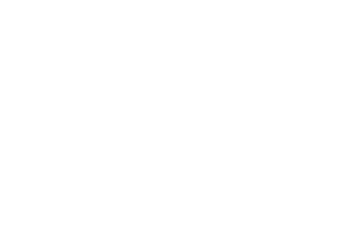

In [17]:
import matplotlib.pyplot as plt
save_maze(final_maze, ".", 0)

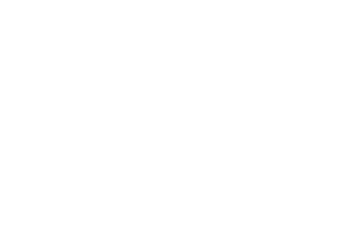

In [19]:


create_mazes(x_SIZE, y_SIZE, 10, "./mazes")